In [1]:
import requests
from config import email, key
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# base_url finds air quality readings by Box

base_url = "https://aqs.epa.gov/data/api/sampleData/byBox?"

#parameters for byBox for CRITERIA Pollutants 
#42401="Sulfur Dioxide" 
#42602="Nitrogen Dioxide"
#42201="Ozone"
#42101 = "Carbon Monoxide"
#14129 = "Lead"

#Landers, CA eartquake 1992-06-28, (34.200, -116.437)
#search for readings performed 1 week before to 1 week after the event
#search for readings in .5 degree radius of the event epicenter

param_url = "param=42401,42602,44201,42101,14129"
date_range_url = "bdate=19920621&edate=19920705"
geometry_url = "minlat=33.200&maxlat=35.200&minlon=-117.437&maxlon=-115.437"

url = (base_url + param_url + "&email=" + email + "&key=" + key + "&" + date_range_url + "&" + geometry_url)

In [17]:
#j Perform the search, jsonify the results, and store the data as "response"

search = requests.get(url)
response = search.json()
response

{'Header': [{'status': 'Success',
   'request_time': '2019-10-12T14:19:40-04:00',
   'url': 'https://aqs.epa.gov/data/api/sampleData/byBox?param=42401,42602,44201,42101,14129&email=ronneimark@hotmail.com&key=tawnybird31&bdate=19920621&edate=19920705&minlat=33.200&maxlat=35.200&minlon=-117.437&maxlon=-115.437',
   'rows': 12143}],
 'Data': [{'state_code': '06',
   'county_code': '071',
   'site_number': '9004',
   'parameter_code': '42101',
   'poc': 1,
   'latitude': 34.106678,
   'longitude': -117.274063,
   'datum': 'NAD83',
   'parameter': 'Carbon monoxide',
   'date_local': '1992-07-05',
   'time_local': '23:00',
   'date_gmt': '1992-07-06',
   'time_gmt': '07:00',
   'sample_measurement': 2.0,
   'units_of_measure': 'Parts per million',
   'sample_duration': '1 HOUR',
   'sample_frequency': 'HOURLY',
   'detection_limit': 0.5,
   'uncertainty': None,
   'qualifier': None,
   'method_type': 'Non-FRM',
   'method_code': '011',
   'method': 'INSTRUMENTAL - NONDISPERSIVE INFRARED',
  

In [19]:
# iterate through the json data and establish a dataframe of the relevant fields

record_list = []
i=0

for record in response['Data']:
    county = response['Data'][i]['county']
    station = response['Data'][i]['site_number']
    parameter = response['Data'][i]['parameter']
    date = response['Data'][i]['date_local']
    time = response['Data'][i]['time_local']
    measurement = response['Data'][i]['sample_measurement']
    measurement_unit = response['Data'][i]['units_of_measure']
    record_dict = {"Parameter":parameter,"Date":date,"Time":time,"County":county,"Station":station,"Measurement":measurement,"Unit":measurement_unit}
    record_list.append(record_dict)

    i += 1
    
record_df = pd.DataFrame(record_list)

record_df.head()

# also create dataframe grouped by Parameter and Date

recordgroupby_df = record_df.groupby(['Parameter','Date'],as_index=False).mean()
record_df



,Parameter,Date,Time,County,Station,Measurement,Unit
0,Carbon monoxide,1992-07-05,23:00,San Bernardino,9004,2.0,Parts per million
1,Carbon monoxide,1992-07-05,22:00,San Bernardino,9004,2.0,Parts per million
2,Carbon monoxide,1992-07-05,21:00,San Bernardino,9004,1.0,Parts per million
3,Carbon monoxide,1992-07-05,20:00,San Bernardino,9004,1.0,Parts per million
4,Carbon monoxide,1992-07-05,19:00,San Bernardino,9004,1.0,Parts per million
...,...,...,...,...,...,...,...
12138,Sulfur dioxide,1992-06-27,00:00,San Bernardino,9002,0.1,Parts per billion
12139,Sulfur dioxide,1992-06-24,00:00,San Bernardino,9002,0.1,Parts per billion
12140,Sulfur dioxide,1992-07-04,00:00,San Bernardino,9010,0.0,Parts per billion
12141,Sulfur dioxide,1992-07-01,00:00,San Bernardino,9010,0.0,Parts per billion


In [20]:
# save dataframes to a csv file. 

record_df.to_csv("Records.csv")
recordgroupby_df.to_csv("RecordsByStation.csv")

In [21]:
#Extract NO2 data from the groupby

Nitrogen_Dioxide = recordgroupby_df['Parameter']=="Nitrogen dioxide (NO2)"
record_NO2 = recordgroupby_df[Nitrogen_Dioxide]
record_NO2.head()

,Parameter,Date,Measurement
15,Nitrogen dioxide (NO2),1992-06-21,22.345679
16,Nitrogen dioxide (NO2),1992-06-22,28.187500
17,Nitrogen dioxide (NO2),1992-06-23,28.616352
18,Nitrogen dioxide (NO2),1992-06-24,24.629630
19,Nitrogen dioxide (NO2),1992-06-25,23.899371


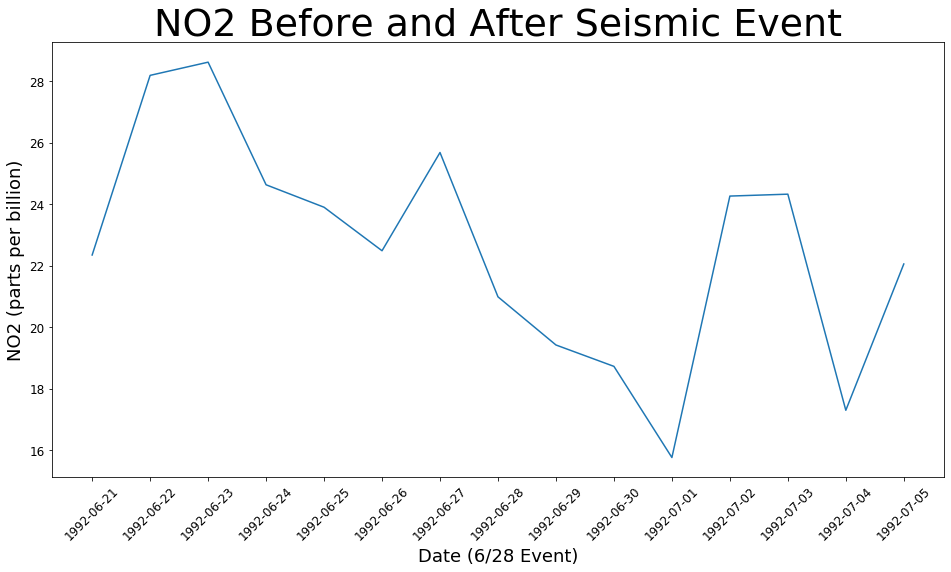

In [22]:
# Plot the NO2 data with line chart

plt.plot(record_NO2['Date'],record_NO2['Measurement'])
plt.title('{0}'.format("NO2 Before and After Seismic Event"), fontsize =38)
plt.xlabel("Date (6/28 Event)", fontsize = 18)
plt.ylabel("NO2 (parts per billion)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.xticks(rotation=45)
plt.show()


In [23]:
# Extract SO2 data from the groupby dataframe

Sulfur_Dioxide = recordgroupby_df['Parameter']=="Sulfur dioxide"
record_SO2 = recordgroupby_df[Sulfur_Dioxide]
record_SO2.head()

,Parameter,Date,Measurement
45,Sulfur dioxide,1992-06-21,0.000000
46,Sulfur dioxide,1992-06-22,0.769231
47,Sulfur dioxide,1992-06-23,0.967742
48,Sulfur dioxide,1992-06-24,0.845263
49,Sulfur dioxide,1992-06-25,0.000000


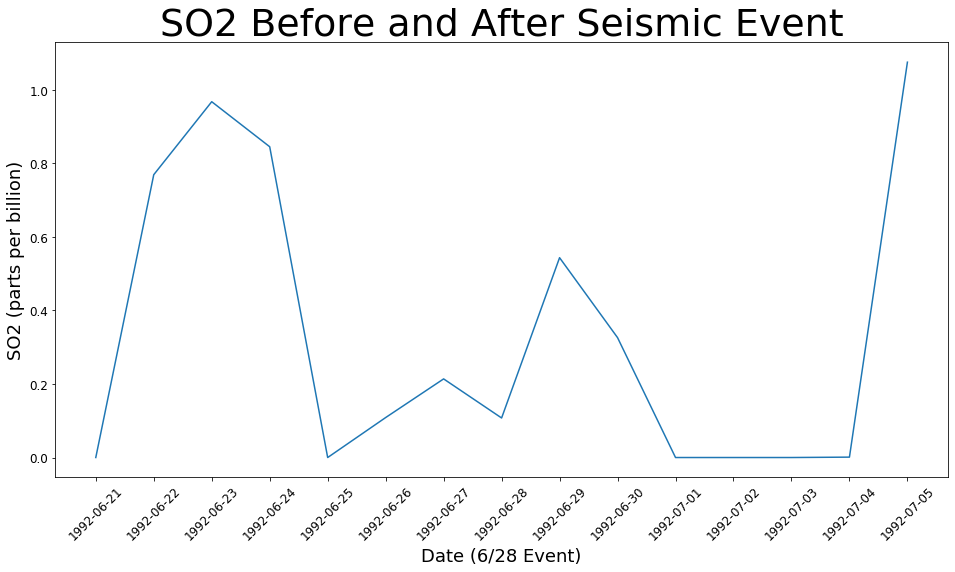

In [24]:
# Chart the SO2 Data

plt.plot(record_SO2['Date'],record_SO2['Measurement'])
plt.title('{0}'.format("SO2 Before and After Seismic Event"), fontsize =38)
plt.xlabel("Date (6/28 Event)", fontsize = 18)
plt.ylabel("SO2 (parts per billion)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.xticks(rotation=45)
plt.show()

In [25]:
# Extract Ozone from the groupby dataframe

Ozone = recordgroupby_df['Parameter']=="Ozone"
record_Ozone = recordgroupby_df[Ozone]
record_Ozone.head()

,Parameter,Date,Measurement
30,Ozone,1992-06-21,0.057658
31,Ozone,1992-06-22,0.049809
32,Ozone,1992-06-23,0.045228
33,Ozone,1992-06-24,0.035496
34,Ozone,1992-06-25,0.053129


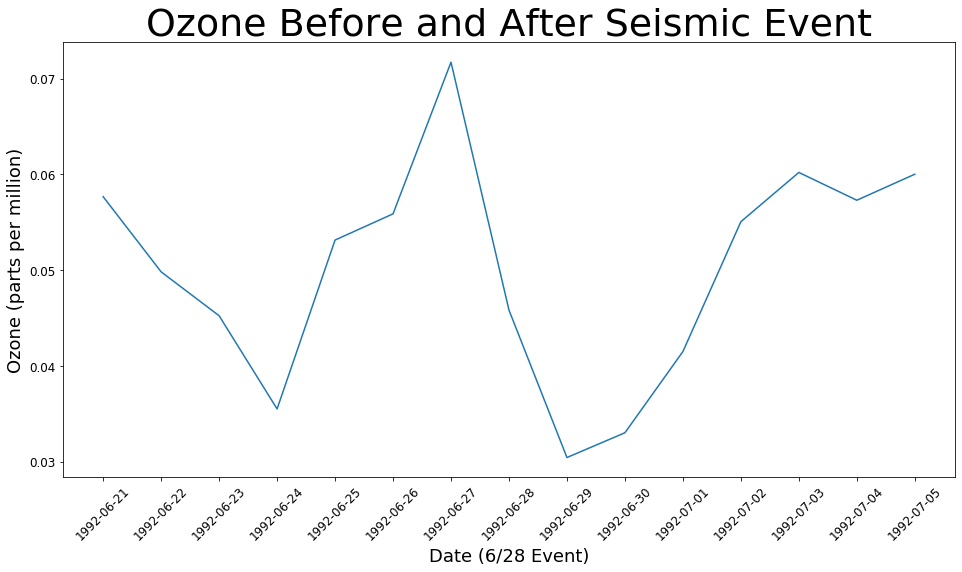

In [26]:
#Chart the Ozone Data

plt.plot(record_Ozone['Date'],record_Ozone['Measurement'])
plt.title('{0}'.format("Ozone Before and After Seismic Event"), fontsize =38)
plt.xlabel("Date (6/28 Event)", fontsize = 18)
plt.ylabel("Ozone (parts per million)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.xticks(rotation=45)
plt.show()

In [27]:
# Extract CO from the groupby dataframe

Carbon_Monoxide = recordgroupby_df['Parameter']=="Carbon monoxide"
record_CO = recordgroupby_df[Carbon_Monoxide]

record_CO.head()

,Parameter,Date,Measurement
0,Carbon monoxide,1992-06-21,0.809816
1,Carbon monoxide,1992-06-22,1.149068
2,Carbon monoxide,1992-06-23,1.136646
3,Carbon monoxide,1992-06-24,0.950617
4,Carbon monoxide,1992-06-25,0.975309


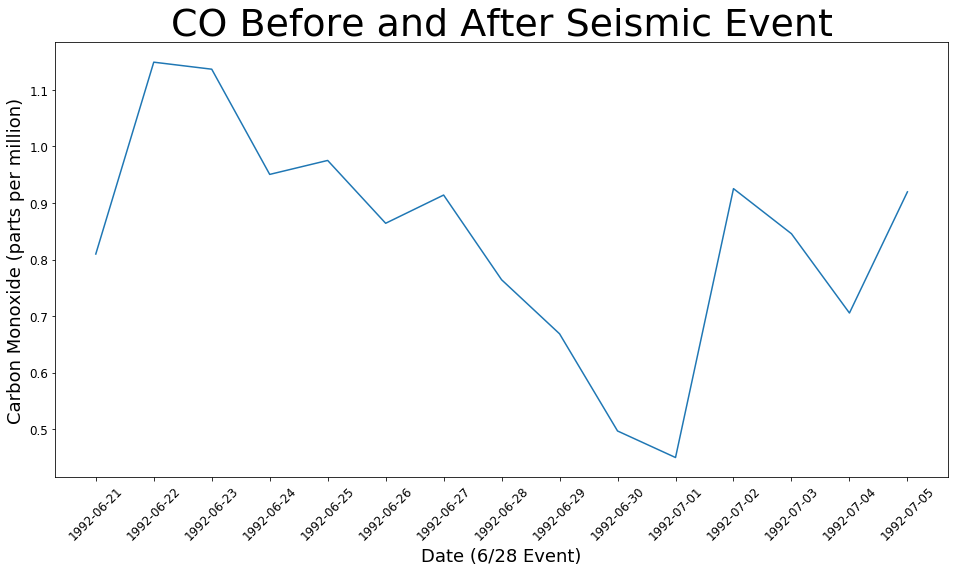

In [28]:
#Chart the Carbon Monoxide Data

plt.plot(record_CO['Date'],record_CO['Measurement'])
plt.title('{0}'.format("CO Before and After Seismic Event"), fontsize =38)
plt.xlabel("Date (6/28 Event)", fontsize = 18)
plt.ylabel("Carbon Monoxide (parts per million)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.xticks(rotation=45)
plt.show()

In [29]:
Lead = recordgroupby_df['Parameter']=="Lead (TSP) LC"
record_lead = recordgroupby_df[Lead]

record_lead.head()

,Parameter,Date,Measurement
